# Análise sobre ataque de tubarões


### Objetivo:
### Alertar os surfistas sobre o alto índice de ataque de tubarões em todo o mundo 
### Traremos informações de países e regiões com maiores índices nos últimos 10 anos

In [2]:
!pip install openpyxl
#!pip install scikit-image

# Importando Bibliotecas e Base de Dados

In [3]:
import pandas as pd
import numpy as np
from pandas import DataFrame

In [4]:
df = pd.read_csv('./attacks.csv', encoding='latin-1')

# Explorando os Dados

In [6]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(25723, 24)

In [8]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [9]:
df.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Nome colunas
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [11]:
# Quantidade de linhas duplicadas
df.duplicated().value_counts()

True     19411
False     6312
dtype: int64

# Limpeza de Dados

In [12]:
# Removendo as linhas duplicadas e criando um novo data freme
df_new = df.drop_duplicates()
print(f'Numero de linhas removidas: {len(df) - len(df_new)}')

Numero de linhas removidas: 19411


In [13]:
# Removendo colunas que nao possuem informacoes relaventes para esta analise
df_new = df.drop(['Case Number','Date','Location','Name','Sex ','Age', 'Injury','Time','Fatal (Y/N)','Species ','Investigator or Source','pdf','href formula','Case Number.1','Case Number.2','original order', 'Unnamed: 22','Unnamed: 23'], axis=1)

In [15]:
# Check novo shape com menos colunas
df_new.shape

(25723, 6)

In [16]:
# Renoemando colunas que farao parte das analises
df_new = df_new.rename(columns={'href': 'Reference'})

In [17]:
# Nomes novas colunas
df_new.columns

Index(['Year', 'Type', 'Country', 'Area', 'Activity', 'Reference'], dtype='object')

In [18]:
# Removendo linhas que contem valores nulos 
df_new.dropna(axis=0, subset=['Year', 'Type', 'Country', 'Area', 'Activity', 'Reference'],inplace=True)
df_new.tail()

,Year,Type,Country,Area,Activity,Reference
6296,0.0,Unprovoked,AUSTRALIA,New South Wales,Swimming,http://sharkattackfile.net/spreadsheets/pdf_di...
6297,0.0,Unprovoked,AUSTRALIA,Western Australia,Diving,http://sharkattackfile.net/spreadsheets/pdf_di...
6298,0.0,Unprovoked,AUSTRALIA,Western Australia,Pearl diving,http://sharkattackfile.net/spreadsheets/pdf_di...
6299,0.0,Unprovoked,USA,North Carolina,Swimming,http://sharkattackfile.net/spreadsheets/pdf_di...
6301,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,Swimming,http://sharkattackfile.net/spreadsheets/pdf_di...


# Analise de resultados

## Aplicando filtro dos últimos 10 anos

In [19]:
# Filtrando os ultimos 10 anos
df_new = df_new[df_new['Year'] >= 2008]
df_new

,Year,Type,Country,Area,Activity,Reference
0,2018.0,Boating,USA,California,Paddling,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.0,Unprovoked,USA,Georgia,Standing,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018.0,Invalid,USA,Hawaii,Surfing,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2018.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2018.0,Provoked,MEXICO,Colima,Free diving,http://sharkattackfile.net/spreadsheets/pdf_di...
...,...,...,...,...,...,...
1295,2008.0,Invalid,NEW ZEALAND,South Island,Wading,http://sharkattackfile.net/spreadsheets/pdf_di...
1296,2008.0,Boat,NEW ZEALAND,North Island,Attempting to chase shark out to sea,http://sharkattackfile.net/spreadsheets/pdf_di...
1297,2008.0,Unprovoked,USA,Florida,Surfing,http://sharkattackfile.net/spreadsheets/pdf_di...
1298,2008.0,Provoked,USA,Florida,Fishing for snapper,http://sharkattackfile.net/spreadsheets/pdf_di...


### Conclusão 1: O maior numero de registros ocorreu em 2015

In [20]:
# Filtrando ano com maior indice:
max_year= df_new.Year.value_counts().idxmax()
print(f'O maior indice foi registrado no ano de {max_year}')

O maior indice foi registrado no ano de 2015.0


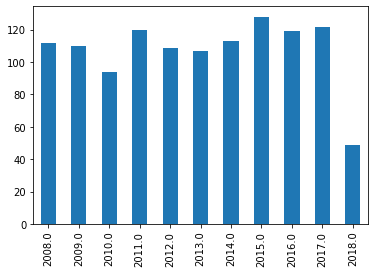

In [21]:
# Analise de 2008 a 2018:
df_new.Year.value_counts().sort_index().plot.bar()

## Atividades praticadas no momento do ataque

### Conclusão 2: O estudo aponta que os surfistas representam 33% do total de atingidos

In [22]:
# Filtrando as atividades com maior indice:
max_activity = df_new.Activity.value_counts().idxmax()
print(f'A atividade {max_activity} possui o maior indice comparado com as demais, indice = {(df_new.Activity == max_activity).mean().round(2)*100}%')

A atividade Surfing possui o maior indice comparado com as demais, indice = 33.0%


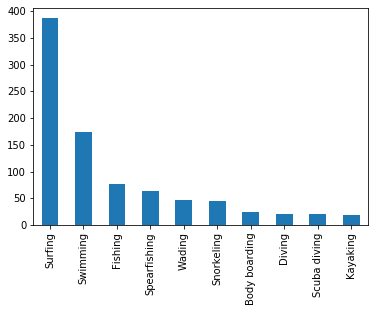

In [23]:
# TOP 10 atividades:
df_new.Activity.value_counts().sort_values(ascending=False).head(10).plot.bar()

## Top 10 de Paises com maiores indices de ataque

### Conclusão 3: O estudo aponta que os Estados Unidos representa 47% do total de ataques

In [24]:
# Filtrando o pais com maior indice:
max_country = df_new.Country.value_counts().idxmax()
print(f'O Pais {max_country} corresponde a {(df_new.Country == max_country).mean().round(2)*100}% do total de ataques ocorridos')

O Pais USA corresponde a 47.0% do total de ataques ocorridos


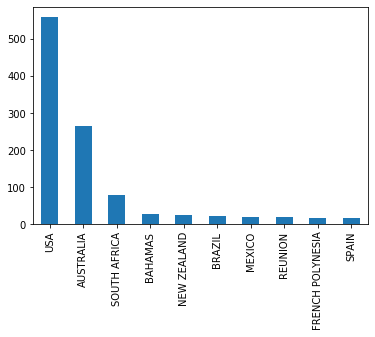

In [25]:
# TOP 10 paises:
df_new.Country.value_counts().sort_values(ascending=False).head(10).plot.bar()

## Top 10 Cidades com maiores indices de ataque

### Conclusão 4: A Florida concentra o maior numero de casos comparado a outras cidades do mundo, atingindo 23%

In [26]:
# Filtrando a regiao com maior indice:
max_area = df_new.Area.value_counts().idxmax()
print(f'A Cidade da {max_area} representa significamente {(df_new.Area == max_area).mean().round(2)*100}% dos casos')

A Cidade da Florida representa significamente 23.0% dos casos


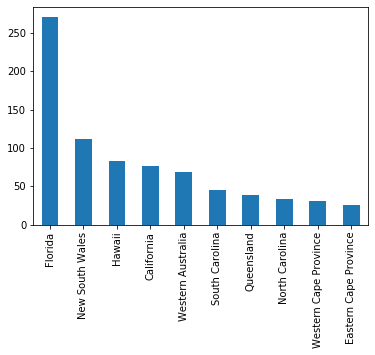

In [27]:
# TOP 10 cidades:
df_new.Area.value_counts().head(10).plot(kind='bar')

# Conclusao Final

### Podemos conlcuir que a maior parte dos ataques sao causados no Surf, pois os surfistas tipicamente vao a lugares mais profundos do mar, onde a maioria das pessoas nao tem acesso. Sendo assim, acabam ficando mais vulneraveis a sofrer ataques acidentalmente. Entao gostariamos de alertar que cidades como Florida, New South Wales e Hawaii precisam ser evitadas para nao se expor tanto a este risco 

# Exportando novo arquivo

In [29]:
df_new.to_csv('./attacks_clean.csv', encoding='latin-1', index = False)

# Proximos passos

### Melhorar as analises utilizando date time e trazendo mais informacoes sobre sexo da pessoa, casos fatais e se os acidentes foram ou nao provocados.